### Plot the outliers

To identify and visualize extreme property prices, we used boxplots and histograms for both houses and apartments.
Using the Interquartile Range (IQR) method, we detected properties with unusually high or low prices.
These outliers were clearly visible in the boxplots, with several data points far from the main distribution.
Removing them helped clean the data and avoid bias in the analysis (e.g., calculating average prices per region).

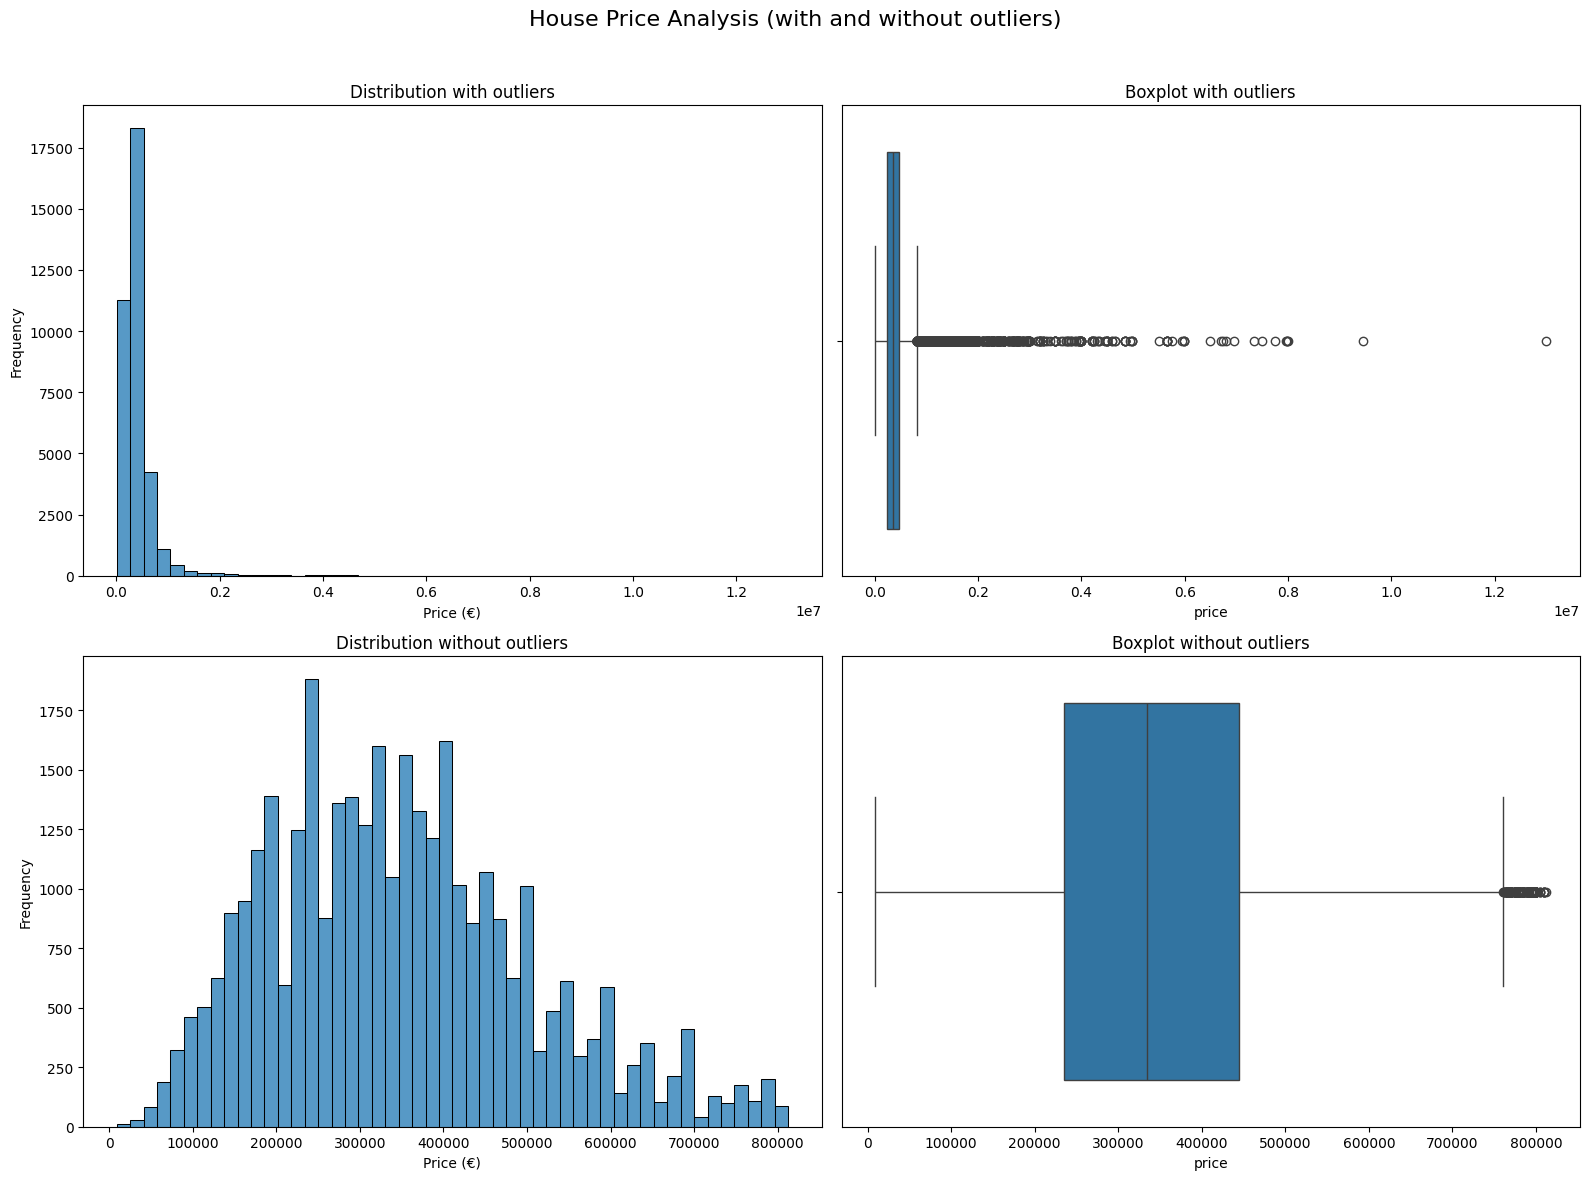

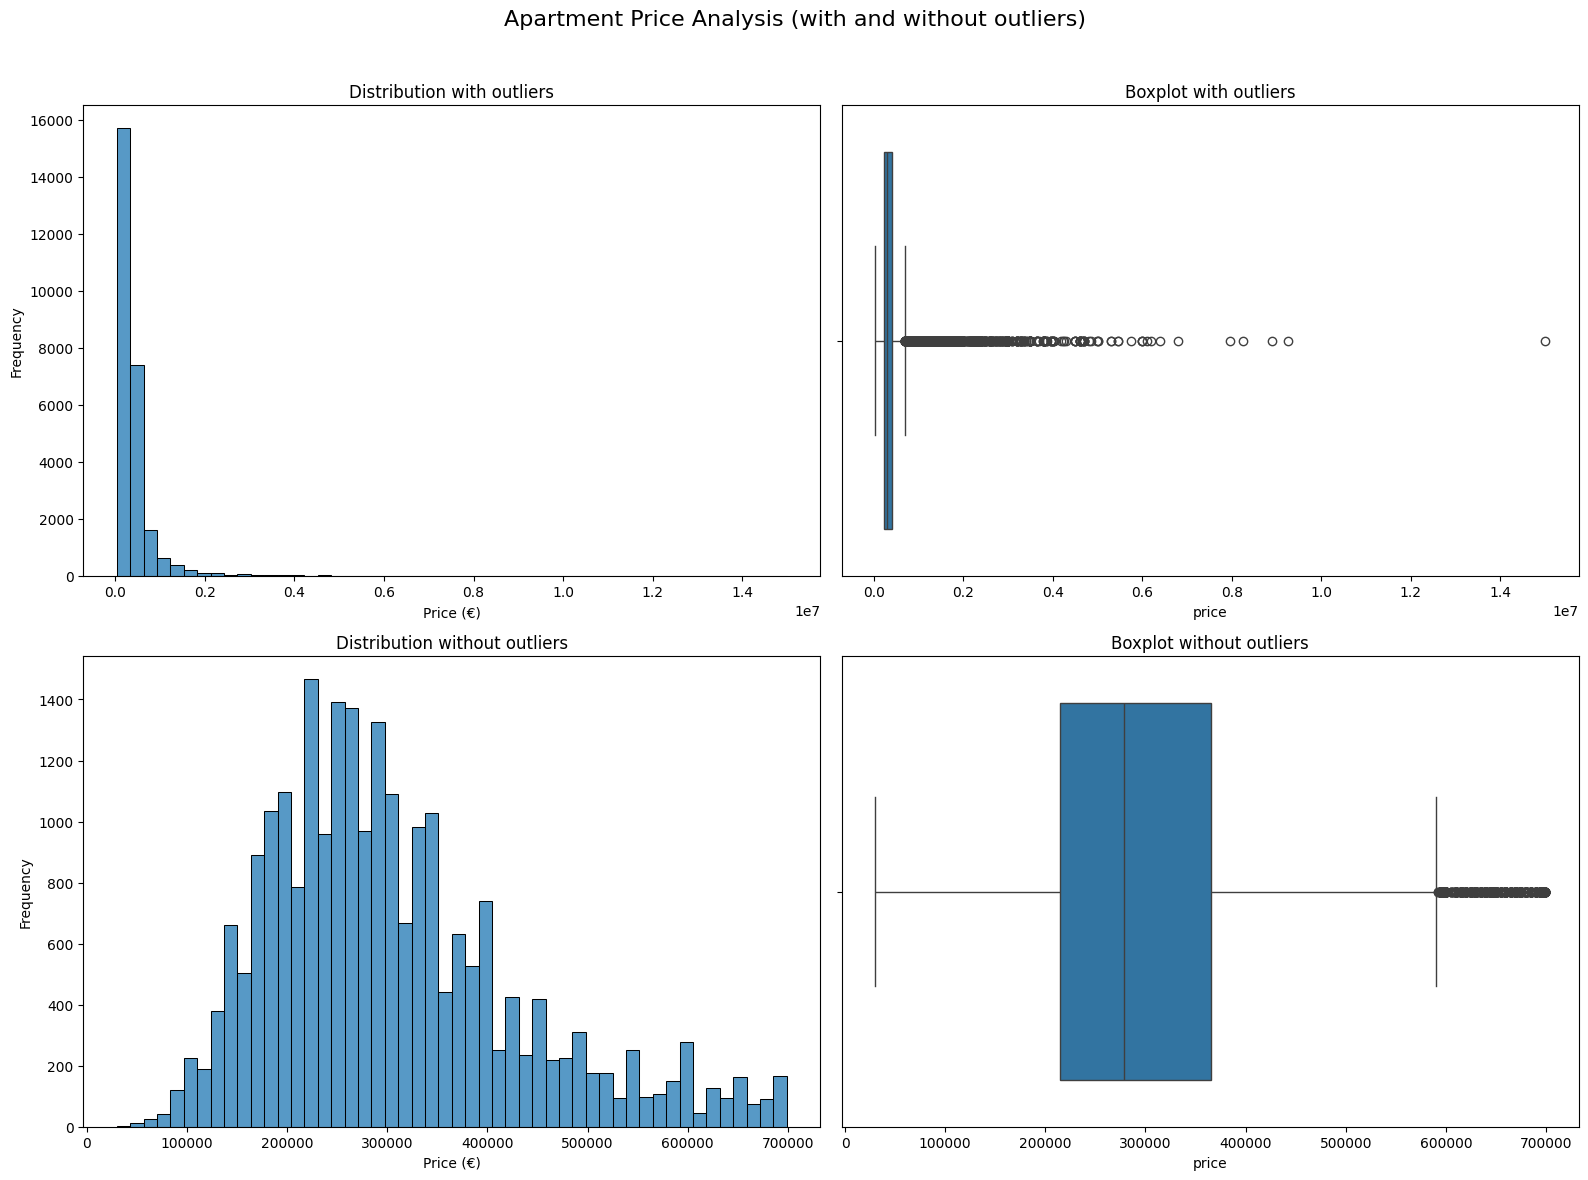

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter
import os

path_to_dataset = "../immoweb-dataset.csv"

# Load the dataset
df = pd.read_csv(path_to_dataset)
df.columns = df.columns.str.strip().str.lower()

# Create folder for saving plots
plot_dir = "price_outliers_plots"
os.makedirs(plot_dir, exist_ok=True)

# Separate house and apartment entries
houses = df[df["subtype"].str.contains("house", case=False, na=False)]
apartments = df[df["subtype"].str.contains("apartment", case=False, na=False)]

# IQR for houses
q1_h, q3_h = houses["price"].quantile([0.25, 0.75])
iqr_h = q3_h - q1_h
lower_h = q1_h - 1.5 * iqr_h
upper_h = q3_h + 1.5 * iqr_h
houses_clean = houses[(houses["price"] >= lower_h) & (houses["price"] <= upper_h)]

# IQR for apartments
q1_a, q3_a = apartments["price"].quantile([0.25, 0.75])
iqr_a = q3_a - q1_a
lower_a = q1_a - 1.5 * iqr_a
upper_a = q3_a + 1.5 * iqr_a
apartments_clean = apartments[(apartments["price"] >= lower_a) & (apartments["price"] <= upper_a)]

# Plot for houses
plt.figure(figsize=(16, 12))
plt.suptitle("House Price Analysis (with and without outliers)", fontsize=16)

plt.subplot(2, 2, 1)
sns.histplot(houses["price"], bins=50)
plt.title("Distribution with outliers")
plt.xlabel("Price (€)")
plt.ylabel("Frequency")

plt.subplot(2, 2, 2)
sns.boxplot(x=houses["price"])
plt.title("Boxplot with outliers")

plt.subplot(2, 2, 3)
sns.histplot(houses_clean["price"], bins=50)
plt.title("Distribution without outliers")
plt.xlabel("Price (€)")
plt.ylabel("Frequency")

plt.subplot(2, 2, 4)
sns.boxplot(x=houses_clean["price"])
plt.title("Boxplot without outliers")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig(f"{plot_dir}/house_price_outliers_analysis.png")
plt.show()

# Plot for apartments
plt.figure(figsize=(16, 12))
plt.suptitle("Apartment Price Analysis (with and without outliers)", fontsize=16)

plt.subplot(2, 2, 1)
sns.histplot(apartments["price"], bins=50)
plt.title("Distribution with outliers")
plt.xlabel("Price (€)")
plt.ylabel("Frequency")

plt.subplot(2, 2, 2)
sns.boxplot(x=apartments["price"])
plt.title("Boxplot with outliers")

plt.subplot(2, 2, 3)
sns.histplot(apartments_clean["price"], bins=50)
plt.title("Distribution without outliers")
plt.xlabel("Price (€)")
plt.ylabel("Frequency")

plt.subplot(2, 2, 4)
sns.boxplot(x=apartments_clean["price"])
plt.title("Boxplot without outliers")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig(f"{plot_dir}/apartment_price_outliers_analysis.png")
plt.show()


In [5]:
# Combine clean house and apartment data into a single DataFrame
df_cleaned = pd.concat([houses_clean, apartments_clean], ignore_index=True)

# Save to CSV for future use
output_dir = "datasets"
os.makedirs(output_dir, exist_ok=True)  # Create directory if it doesn't exist
output_file = os.path.join(output_dir, "cleaned_without_outliers.csv")

df_cleaned.to_csv(output_file, index=False)

# Confirmation
print(f"Cleaned dataset saved to: {output_file}")
print(f"Number of rows after removing outliers: {len(df_cleaned)}")

df_cleaned = pd.read_csv("datasets/cleaned_without_outliers.csv")


Cleaned dataset saved to: datasets\cleaned_without_outliers.csv
Number of rows after removing outliers: 57793
